#Perbandingan Performansi Metode Clustering dan Metode Klasifikasi

Metode Clustering : K-Means Clustering, dan Hierarchical Clustering Single Linkage

Metode Classification : K-Nearest Neighbors Classification, dan Support Vector Machine Classification

# EDA &amp; Data Preprocessing

In [ ]:
#Menyiapkan Pustaka
import numpy as np 
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Baca data
df = pd.read_csv("https://raw.githubusercontent.com/anaconduck/diabetes/main/penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
print(f'Ukuran Data : {df.shape}')

Ukuran Data : (344, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


##EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


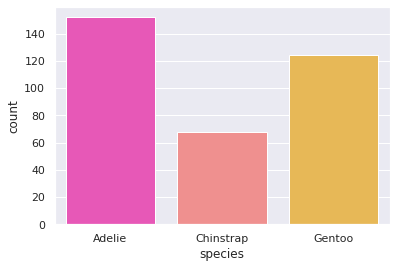

In [ ]:
sns.countplot(df['species'],palette='spring');

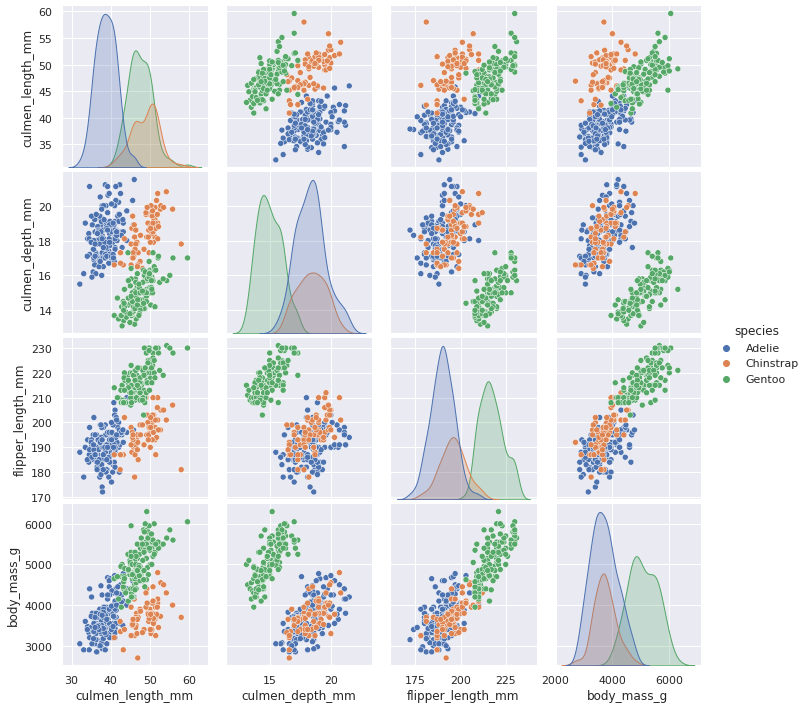

In [ ]:
sns.pairplot(df,hue='species');

Dari gambar diatas, kami dapat melihat clusters dengan pengelompokkan yang baik, yaitu:

1. culmen_length_mm vs culmen_depth_mm ;
2. culmen_length_mm vs flipper_length_mm ;
3. culmen_length_mm vs body_mass_g.

## Impute Missing Value

In [ ]:
100*df.isnull().sum()/len(df)

species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

In [ ]:
df['sex'].fillna(df['sex'].mode()[0],inplace=True)
col_to_be_imputed = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
for item in col_to_be_imputed:
    df[item].fillna(df[item].mean(),inplace=True)

In [ ]:
df.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [ ]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [ ]:
df.loc[336,'sex'] = 'FEMALE'

##Encoding Data

In [ ]:
df['species'] = df['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})

# creating dummy variables
dummies = pd.get_dummies(df[['island','sex']],drop_first=True)

In [ ]:
dummies

,island_Dream,island_Torgersen,sex_MALE
0,0,1,1
1,0,1,0
2,0,1,0
3,0,1,1
4,0,1,0
...,...,...,...
339,0,0,1
340,0,0,0
341,0,0,1
342,0,0,0


## Normalization

In [ ]:
df_to_be_scaled = df.drop(['island','sex'],axis=1)
target = df_to_be_scaled.species
df_feat= df_to_be_scaled.drop('species',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_feat)
df_scaled = scaler.transform(df_feat)
df_scaled = pd.DataFrame(df_scaled,columns=df_feat.columns[:4])
df_normal = pd.concat([df_scaled,dummies,target],axis=1)
df_normal.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE,species
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,0,1,1,0
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,0,1,0,0
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,0,1,0,0
3,1.307172e-15,1.806927e-15,0.000000,0.000000,0,1,1,0
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,0,1,0,0


In [ ]:
df_normal['species'].unique()

array([0, 2, 1])

#K-Means Clustering

In [ ]:
#time counter
import timeit


In [ ]:
#import library
from sklearn.cluster import KMeans

#lakukan clustering
kmeans = KMeans(3,init='k-means++')
kmeans.fit(df_normal.drop('species',axis=1))

[[141   0  11]
 [  0 123   1]
 [  5   0  63]]


In [ ]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1]


In [ ]:
labels = kmeans.labels_.copy()
X=df_normal.copy()
labels_true=df_normal['species'].copy()

In [ ]:
print(classification_report(df_normal.species,kmeans.labels_))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       1.00      0.99      1.00       124
           2       0.84      0.93      0.88        68

    accuracy                           0.95       344
   macro avg       0.94      0.95      0.94       344
weighted avg       0.95      0.95      0.95       344



In [ ]:
f"Accuracy : {np.round(100*accuracy_score(df_normal.species,kmeans.labels_),2)}"

'Accuracy : 95.06'

##Runtime

In [ ]:
print('KMC Time: ', stopkmc - startkmc)

KMC Time:  9.663099990575574e-05


##Evaluasi Clustering

###Davies-Bouldin Index

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

0.9534191405306398

###Silhouette Coefficient

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(X, labels, metric='euclidean')

0.4561612462200026

###Rand index

In [ ]:
from sklearn import metrics
metrics.adjusted_rand_score(labels_true, labels)

0.8723895532348954

###Mutual Information based scores

In [ ]:
from sklearn import metrics
metrics.adjusted_mutual_info_score(labels_true, labels) 

0.8320855556087958

###Homogeneity

In [ ]:
from sklearn import metrics
metrics.homogeneity_score(labels_true, labels)

0.8387365447174371

###Completeness

In [ ]:
from sklearn import metrics
metrics.completeness_score(labels_true, labels)

0.8273786091587741

###V-measure

In [ ]:
from sklearn import metrics
metrics.v_measure_score(labels_true, labels)

0.8330188633174249

###Fowlkes-Mallows scores

In [ ]:
from sklearn import metrics
metrics.fowlkes_mallows_score(labels_true, labels)

0.918138030656963

###Calinski-Harabasz Index

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.calinski_harabasz_score(X, labels)

330.75880439204394

#Hierarchical Clustering Single Linkage


In [ ]:
#time counter
import timeit


In [ ]:
#import library
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#lakukan clustering
startagc = timeit.default_timer()
agc = AgglomerativeClustering(n_clusters=3,linkage='single').fit(df_normal.drop('species',axis=1))
stopagc = timeit.default_timer()
print(confusion_matrix(df_normal.species,agc.labels_))

[[152   0   0]
 [  1 123   0]
 [ 67   0   1]]


In [ ]:
print(agc.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1]


In [ ]:
labels = agc.labels_.copy()
X=df_normal.copy()
labels_true=df_normal['species'].copy()

In [ ]:
print(classification_report(df_normal.species,agc.labels_))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       152
           1       1.00      0.99      1.00       124
           2       1.00      0.01      0.03        68

    accuracy                           0.80       344
   macro avg       0.90      0.67      0.61       344
weighted avg       0.86      0.80      0.73       344



In [ ]:
f"Accuracy : {np.round(100*accuracy_score(df_normal.species,agc.labels_),2)}"

'Accuracy : 80.23'

##Runtime

In [ ]:
print('KMC Time: ', stopagc - startagc)

KMC Time:  0.012160301000221807


##Evaluasi Clustering

###Davies-Bouldin Index

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

0.7673722269599437

###Silhouette Coefficient

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(X, labels, metric='euclidean')

0.3746815662583901

###Rand index

In [ ]:
from sklearn import metrics
metrics.adjusted_rand_score(labels_true, labels)

0.6477753332635344

###Mutual Information based scores

In [ ]:
from sklearn import metrics
metrics.adjusted_mutual_info_score(labels_true, labels) 

0.7407849429901993

###Homogeneity

In [ ]:
from sklearn import metrics
metrics.homogeneity_score(labels_true, labels)

0.6086170245689361

###Completeness

In [ ]:
from sklearn import metrics
metrics.completeness_score(labels_true, labels)

0.952192795543102

###V-measure

In [ ]:
from sklearn import metrics
metrics.v_measure_score(labels_true, labels)

0.7425898255789047

###Fowlkes-Mallows scores

In [ ]:
from sklearn import metrics
metrics.fowlkes_mallows_score(labels_true, labels)

0.81532671477087

###Calinski-Harabasz Index

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.calinski_harabasz_score(X, labels)

157.45825253660237

#K-Nearest Neighbours Classification

In [ ]:
#time counter
import timeit


In [ ]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#membagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(df_normal.drop('species',axis=1),target,test_size=0.50,random_state=24)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
startknn = timeit.default_timer()
preds_knn = knn.predict(X_test)
stopknn = timeit.default_timer()
print(confusion_matrix(y_test,preds_knn))

[[79  0  0]
 [ 0 60  0]
 [ 2  0 31]]


In [ ]:
print(classification_report(y_test,preds_knn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        79
           1       1.00      1.00      1.00        60
           2       1.00      0.94      0.97        33

    accuracy                           0.99       172
   macro avg       0.99      0.98      0.99       172
weighted avg       0.99      0.99      0.99       172



##Runtime

In [ ]:
print('KNN Time: ', stopknn - startknn)

KNN Time:  0.011676911999529693


##Evaluasi Klasifikasi

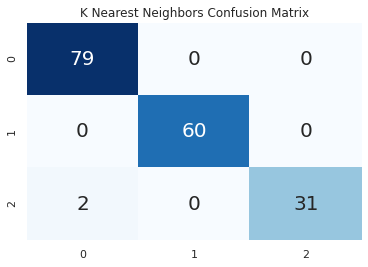

In [ ]:
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,preds_knn),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 20});

In [ ]:
cm=confusion_matrix(y_test,preds_knn)

1. True Positives (TP)  : 

In [ ]:
tp=cm[0,0]
print(tp)

79


2. False Negatives (FN) : 

In [ ]:
fn=cm[0,1]+cm[0,2]
print(fn)

0


3. False Positive (FP)  : 

In [ ]:
fp=cm[1,0]+cm[2,0]
print(fp)

2


4. True Negatives (TN) : 

In [ ]:
tn=cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]
print(tn)

91


In [ ]:
akurasi = (tp+tn) / (tp+tn+fp+fn)
print ("Accuracy : ",akurasi)

Accuracy :  0.9883720930232558


###Recall

In [ ]:
recall = tp / (tp+fn)
print ("Recall : ",recall)

Recall :  1.0


###Specificity

In [ ]:
specificity= tn / (fp+tn)
print ("Specificity : ",specificity)

Specificity :  0.978494623655914


###Precision

In [ ]:
precision = tp / (fp+tp)
print ("Precision : ",precision)

Precision :  0.9753086419753086


###F1_Measure

In [ ]:
f1 = (2*precision*recall) / (precision + recall)
print ("F1-Measure : ",f1)

F1-Measure :  0.9875


#Support Vector Machine Classification

In [ ]:
#time counter
import timeit


In [ ]:
#membagi import library
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#membagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(df_normal.drop('species',axis=1),target,test_size=0.50,random_state=24)

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
startsvm = timeit.default_timer()
preds_svm = svc_model.predict(X_test)
stopsvm = timeit.default_timer()
print(confusion_matrix(y_test,preds_svm))

[[79  0  0]
 [ 0 60  0]
 [ 4  0 29]]


In [ ]:
print(classification_report(y_test,preds_svm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        79
           1       1.00      1.00      1.00        60
           2       1.00      0.88      0.94        33

    accuracy                           0.98       172
   macro avg       0.98      0.96      0.97       172
weighted avg       0.98      0.98      0.98       172



##Runtime

In [ ]:
print('SVM Time: ', stopsvm - startsvm)

SVM Time:  0.0020342839998193085


##Evaluasi Klasifikasi

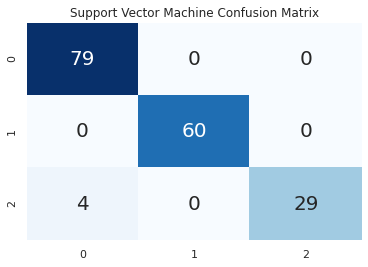

In [ ]:
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,preds_svm),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 20});

In [ ]:
cm=confusion_matrix(y_test,preds_svm)

1. True Positives (TP)  : 

In [ ]:
tp=cm[0,0]
print(tp)

79


2. False Negatives (FN) : 

In [ ]:
fn=cm[0,1]+cm[0,2]
print(fn)

0


3. False Positive (FP)  : 

In [ ]:
fp=cm[1,0]+cm[2,0]
print(fp)

4


4. True Negatives (TN) : 

In [ ]:
tn=cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]
print(tn)

89


In [ ]:
akurasi = (tp+tn) / (tp+tn+fp+fn)
print ("Accuracy : ",akurasi)

Accuracy :  0.9767441860465116


###Recall

In [ ]:
recall = tp / (tp+fn)
print ("Recall : ",recall)

Recall :  1.0


###Specificity

In [ ]:
specificity= tn / (fp+tn)
print ("Specificity : ",specificity)

Specificity :  0.956989247311828


###Precision

In [ ]:
precision = tp / (fp+tp)
print ("Precision : ",precision)

Precision :  0.9518072289156626


###F1_Measure

In [ ]:
f1 = (2*precision*recall) / (precision + recall)
print ("F1-Measure : ",f1)

F1-Measure :  0.9753086419753086
